# Load packages

In [17]:
# Loading the required packages to run this notebook
from src.visualisation.SummaryModels import SummaryModels
import src.utils.utils as utils
from src.visualisation.VisualiseTrajectories import VisualiseTrajectories
from src.data.Datasets import AISDataset
from pathlib import Path
import pandas as pd

# Define the region to look into
region = "Skagen"
zoom = 7
n = 10

# Indices to plot
indices = [91930129, 53136976, 92178034, 53670047, 53245105, 53651637, 53347053, 14919426, 121270034, 34338119, 15465888]

In [6]:
# Use the SummaryModels class for everything related to the reconstructions
file_name = "RegionSkagen_01062019_30092019_Fish_14400_86400_600"
generative_dist = "Diagonal"
learning_rate = 0.001
scheduler_gamma = [0.8, 0.7]
scheduler_milestones = [20, 40]
use_generative_bias = True

# Use the SummaryModels class
summary_models = SummaryModels(file_name, generative_dist=generative_dist, learning_rate=learning_rate,
                               scheduler_gamma=scheduler_gamma, scheduler_milestones=scheduler_milestones,
                               use_generative_bias=use_generative_bias)

In [7]:
# Use the VisualiseTrajectories class for geographically visualising trajectories 
fig_size = (10, 10)
visualise_trajectories = VisualiseTrajectories(region, save_figures=False, plot_figures=True, fig_size=fig_size, zoom=zoom)
processed_data_dir =  visualise_trajectories.processed_data_dir

# Read the info file to know how to read the data file
data_file = processed_data_dir / ("data_" + file_name + ".pkl")
data_info_file = processed_data_dir / ("datasetInfo_" + file_name + ".pkl")
data_info = utils.read_data_info_file(data_info_file)

# Load the static Google Map image for the RIO
img = visualise_trajectories.read_static_map()

In [25]:
# Function that plots the actual and reconstructed side by side
def plot_actual_reconstructed(index):
    # Setup for the plotting
    fig_size_tmp = visualise_trajectories.fig_size
    visualise_trajectories.fig_size = (20,10)
    fig, ax = visualise_trajectories.visualise_static_map(img, subplots=[1, 2])
    plot_figures_tmp = visualise_trajectories.plot_figures
    visualise_trajectories.plot_figures = False
        
    # For plotting a single complete vessel trajectory on the static map
    data_set = AISDataset(file_name, data_info=data_info, indicies=[index], discrete=False)
    df_actual = utils.get_tracks_from_dataset(data_set, continuous_representation=True)
    
    # For plotting the corresponding model reconstruction
    index = int(df_n[df_n["Index"] == index]["Data set Index"])
    data_set = train_evaluate.test_dataloader.dataset
    reconstruction = train_evaluate.track_reconstructions(data_set, index)
    df_recon = reconstruction["Reconstruction"][2:]
    
    # Setup actual and reconstruction data frames
    df_speed = utils.concat_actual_recon(df_actual, df_recon, "Speed")
    df_course = utils.concat_actual_recon(df_actual, df_recon, "Course")
    df_speed["Type"] = df_speed["Type"].str.replace("Actual", "Actual speed")
    df_course["Type"] = df_course["Type"].str.replace("Actual", "Actual course")
    
    # Do the actual plotting
    visualise_trajectories.plot_single_track(df_actual, ax[0], use_cmap=True, df_speed=df_speed,
                                             df_course=df_course, fig=fig, rect=[0.15, 0.72, 0.12, 0.12], 
                                             rect2=[0.575, 0.72, 0.12, 0.12])
    visualise_trajectories.plot_figures = plot_figures_tmp
    visualise_trajectories.plot_single_track(df_recon, ax[1], use_cmap=True)
    visualise_trajectories.fig_size = fig_size_tmp
    return {"Actual trajectory": df_actual, "Reconstructed trajectory": df_recon,
            "Speed data frame": df_speed, "Course data frame": df_course}

# Fishing Reconstruction Example

In [9]:
# Get some trajectories to show an example from 
validation = False 
data = summary_models.run_evaluation_get_n(n=3250, worst=False, validation=validation)
df_n = data["TrajectoryLevelData"]
train_evaluate = data["TrainEvaluateObject"]

C:\Github\vessel-trajectory-anomaly-detection\models\saved-models\VRNN_RegionSkagen_01062019_30092019_Fish_14400_86400_600_latent100_recurrent100_batchNormFalse_Diagonal_GBT_S2040_0807.pth


     Data set Index     Index       MMSI  Longitude   Latitude     Speed  \
0                 0  91930129  219015362  10.962013  57.733936  7.161856   
1                 0  91930129  219015362  10.943262  57.750332  7.077670   
2                 0  91930129  219015362  10.912313  57.753353  7.477012   
3                 0  91930129  219015362  10.872969  57.750252  7.341122   
4                 0  91930129  219015362  10.839084  57.752136  6.671250   
..              ...       ...        ...        ...        ...       ...   
138               0  91930129  219015362  10.747334  57.483772  3.250820   
139               0  91930129  219015362  10.744428  57.474792  3.211268   
140               0  91930129  219015362  10.740088  57.465714  3.247297   
141               0  91930129  219015362  10.743873  57.458359  3.140625   
142               0  91930129  219015362  10.749761  57.450165  3.147458   

         Course Ship type  Track length          Time stamp  
0    225.195877   Fishing

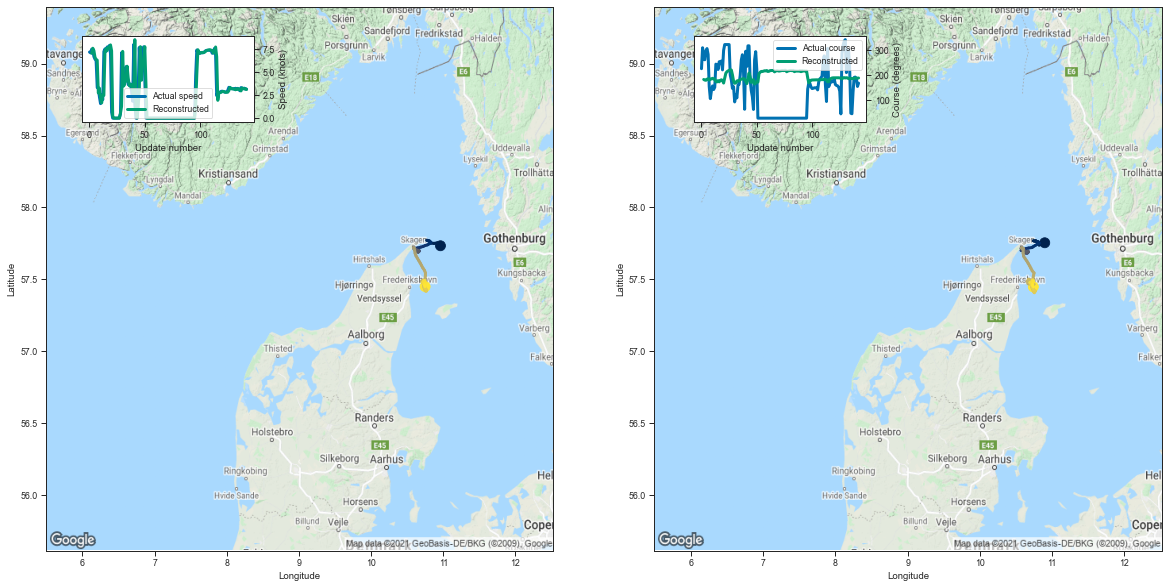

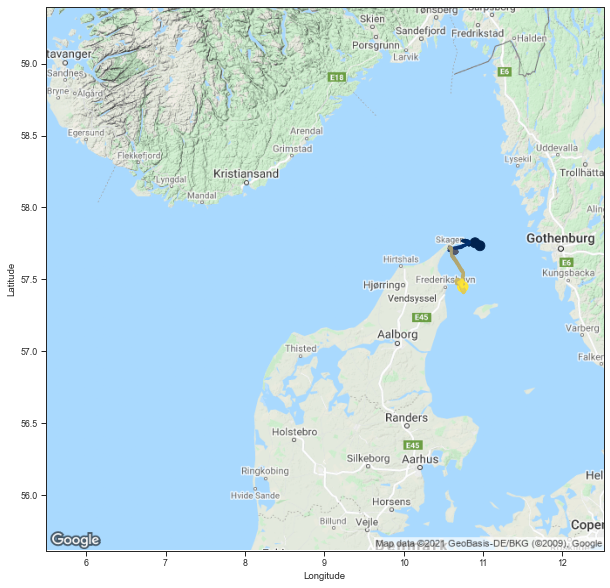

In [29]:
# Plot the actual and reconstructed trajectories side by side
tracks = plot_actual_reconstructed(indices[0])

# Plot them on the same figure
visualise_trajectories.fig_size = fig_size
plot_figures_tmp = visualise_trajectories.plot_figures
fig, ax = visualise_trajectories.visualise_static_map(img)
visualise_trajectories.plot_figures = False
visualise_trajectories.plot_single_track(tracks["Actual trajectory"], ax, use_cmap=True)
visualise_trajectories.plot_figures = plot_figures_tmp
visualise_trajectories.plot_single_track(tracks["Reconstructed trajectory"], ax, use_cmap=True)

print(tracks['Actual trajectory'])

--------------- Index: 0 (91930129) ---------------
Speed in track order:
[7.161855697631836, 7.077670097351074, 7.477011680603027, 7.341121673583984, 6.671249866485596, 6.394381999969482, 6.220388412475586, 3.314736843109131, 3.276249885559082, 2.2940475940704346, 1.5750000476837158, 2.5552940368652344, 2.0015268325805664, 7.2137932777404785, 7.508264541625977, 7.224836826324463, 7.715217590332031, 7.565263271331787, 7.879310131072998, 7.010000228881836, 0.6480000019073486, 0.0, 0.0, 0.0, 0.0, 0.0, 0.01406249962747097, 0.0, 0.49452054500579834, 7.0914530754089355, 3.500917434692383, 4.055844306945801, 4.136842250823975, 5.57869815826416, 4.645161151885986, 3.6396946907043457, 3.711199998855591, 3.700000047683716, 3.002142906188965, 1.836363673210144, 7.992537498474121, 1.5199999809265137, 0.0, 0.0, 2.9132742881774902, 7.660465240478516, 4.949038505554199, 4.945217609405518, 5.956756591796875, 7.733333110809326, 4.293919086456299, 0.008064515888690948, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0

--------------- Index: 3 (53670047) ---------------
Speed in track order:
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.014545454643666744, 0.007407407276332378, 0.0, 0.0, 0.0, 0.0020408162381500006, 0.0, 0.0, 0.0, 0.0, 0.0, 0.028070176020264626, 0.009999999776482582, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.003636363660916686, 0.0017857142956927419, 0.003225806402042508, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0016949152341112494, 0.0, 0.0, 0.0, 0.0, 0.0, 0.003225806402042508, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0017241379246115685, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006666666828095913, 0.0, 0.0032786885276436806, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001612903201021254, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0017241379246115685, 0.0, 0.0, 0.0053571430034935474, 0.0, 0.0, 0.0, 0.0, 0.0, 0.05161290243268013, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 

--------------- Index: 6 (53347053) ---------------
Speed in track order:
[2.626666784286499, 2.538181781768799, 2.5783333778381348, 2.609999895095825, 2.6661291122436523, 2.594827651977539, 2.5999999046325684, 2.601785659790039, 2.5931034088134766, 2.5490195751190186, 2.587930917739868, 2.5962963104248047, 2.5983333587646484, 2.596226453781128, 1.8166667222976685, 3.2803921699523926, 8.426316261291504, 8.087718963623047, 7.770175457000732, 7.701666831970215, 8.483606338500977, 9.10689640045166, 8.218644142150879, 0.49047619104385376, 1.5819672346115112, 0.0, 0.40344828367233276, 0.0, 0.004000000189989805, 0.010526316240429878, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.004838709719479084, 0.0, 0.0, 0.0037735849618911743, 0.0, 0.001612903201021254, 0.0, 0.001818181830458343, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001923076924867928, 0.0, 0.0, 0.0, 0.0018867924809455872, 0.0, 0.0017857142956927419, 0.0, 0.0042553190141916275, 0.0037735

--------------- Index: 8 (121270034) ---------------
Speed in track order:
[1.8053570985794067, 1.7999999523162842, 1.7999999523162842, 1.7999999523162842, 1.7999999523162842, 1.7999999523162842, 1.9693548679351807, 2.030508518218994, 1.996363639831543, 1.9885245561599731, 2.1589040756225586, 2.045161247253418, 1.8950819969177246, 1.8822580575942993, 1.8887096643447876, 1.8322581052780151, 1.8431034088134766, 1.8266667127609253, 1.82909095287323, 1.858823537826538, 1.8473684787750244, 1.8873015642166138, 1.8639343976974487, 1.8949999809265137, 1.899999976158142, 1.899999976158142, 1.898305058479309, 1.9017857313156128, 1.953125, 1.9269840717315674, 1.9616667032241821, 1.9661290645599365, 1.9296296834945679, 1.922806978225708, 1.993220329284668, 2.0057692527770996, 2.0, 1.9134615659713745, 1.899999976158142, 1.9092592000961304, 1.9583333730697632, 1.939130425453186, 1.896226406097412, 0.8704918026924133, 1.525742530822754, 0.5666666626930237, 2.377631664276123, 4.757143020629883, 4.5812

--------------- Index: 10 (15465888) ---------------
Speed in track order:
[7.361111164093018, 7.2833333015441895, 6.655555725097656, 3.394117593765259, 2.682499885559082, 2.6584906578063965, 2.70862078666687, 2.7795917987823486, 2.6937499046325684, 2.622727155685425, 2.9109091758728027, 2.6857142448425293, 2.4839999675750732, 2.450000047683716, 2.4200000762939453, 2.4000000953674316, 2.4609756469726562, 2.481818199157715, 2.484999895095825, 2.4911763668060303, 2.9437499046325684, 2.813636302947998, 2.70652174949646, 2.7195651531219482, 2.6885714530944824, 2.690476179122925, 2.7149999141693115, 2.7941176891326904, 2.9019999504089355, 3.0142858028411865, 2.445833444595337, 2.433333396911621, 2.5062499046325684, 2.582758665084839, 2.5833332538604736, 1.8413792848587036, 1.5358490943908691, 3.988461494445801, 5.850847244262695, 5.647058963775635, 5.386440753936768, 5.1370368003845215, 5.134615421295166, 4.897561073303223, 1.1114754676818848, 0.22982455790042877, 7.248888969421387, 0.65263

Data set Index      Index       MMSI Ship type  Length  \
1862            1862  125744777  219650000   Fishing     142   
3155            3155   21295481  219001559   Fishing     144   
2405            2405  105901310  219023911   Fishing     143   
175              175  105956540  219023911   Fishing     143   
2617            2617  105947335  219023911   Fishing     143   
...              ...        ...        ...       ...     ...   
1603            1603   81946722  219012521   Fishing     144   
2                  2  209424870  257059320   Fishing      29   
1688            1688  217543407  257754500   Fishing      35   
1703            1703    3312558  211314890   Fishing     139   
846              846   38820086  219005454   Fishing      41   

      Reconstruction log probability  \
1862                     1220.427246   
3155                     1232.709229   
2405                     1218.825439   
175                      1213.972900   
2617                     1211.101685   
...                              ...   
1603                    -1303.569336   
2                        -303.380219   
1688                     -372.395966   
1703                    -2648.252197   
846                    -37839.539062   

      Equally weighted reconstruction log probability  
1862                                         8.594558  
3155                                         8.560481  
2405                                         8.523255  
175                                          8.489321  
2617                                         8.469243  
...                                               ...  
1603                                        -9.052565  
2                                          -10.461387  
1688                                       -10.639885  
1703                                       -19.052174  
846                                       -922.915587  

[3248 rows x 7 columns]

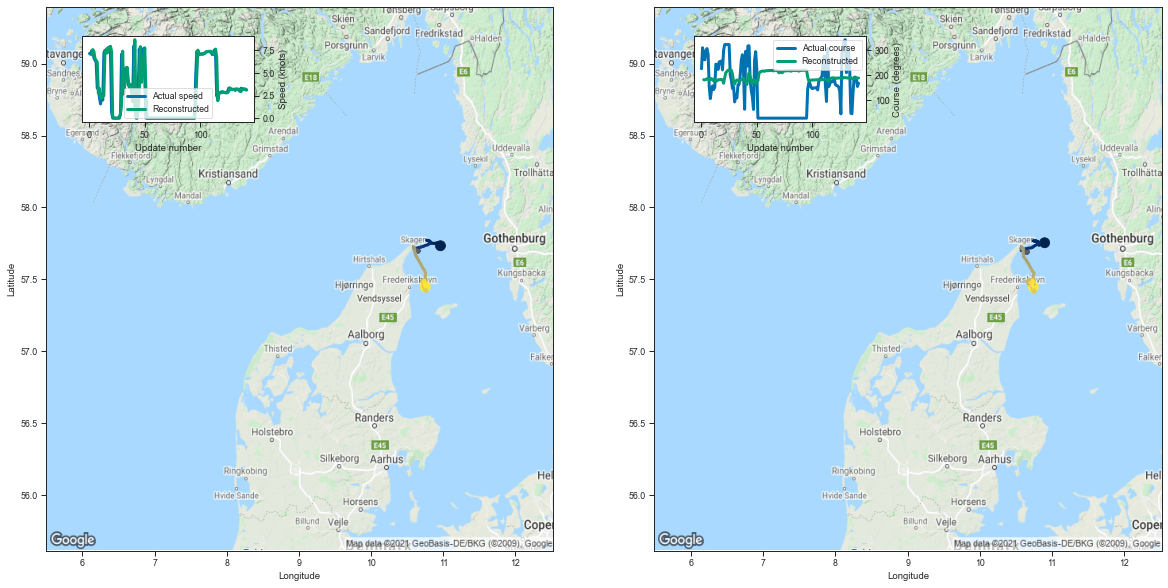

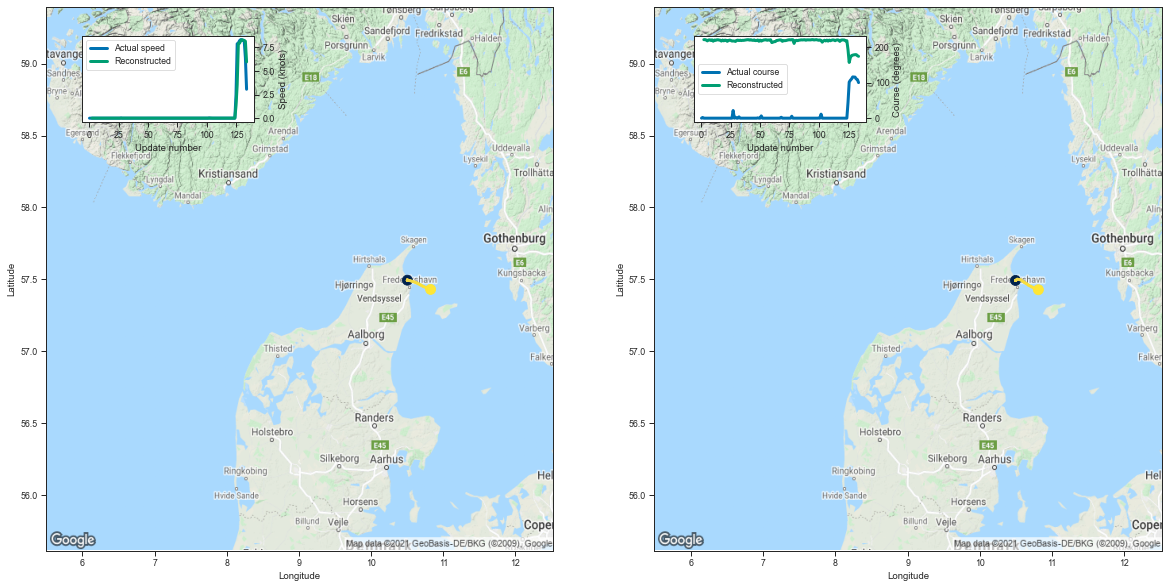

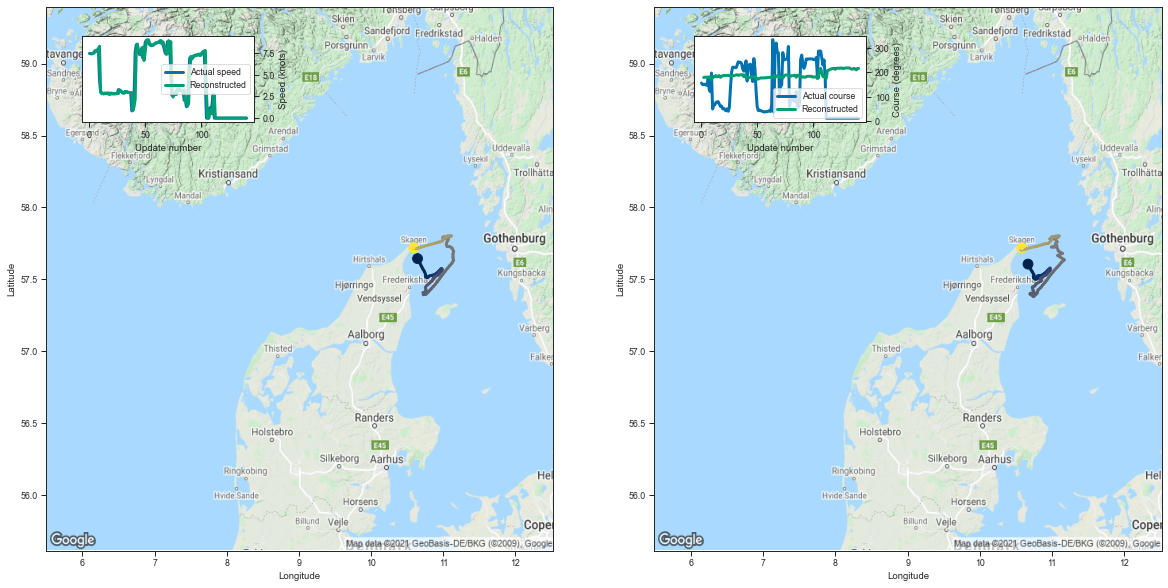

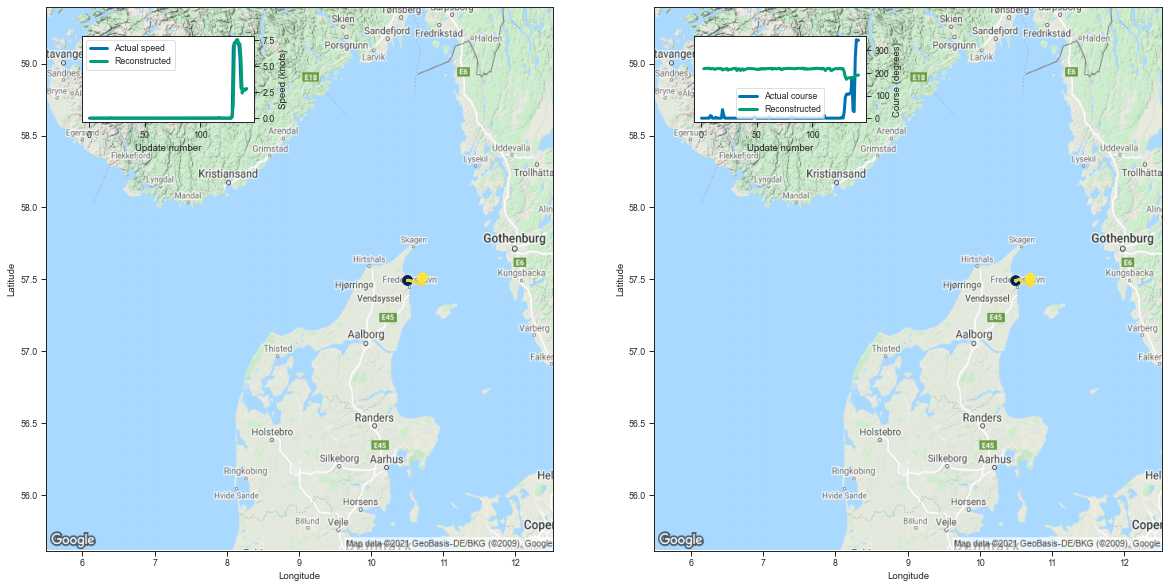

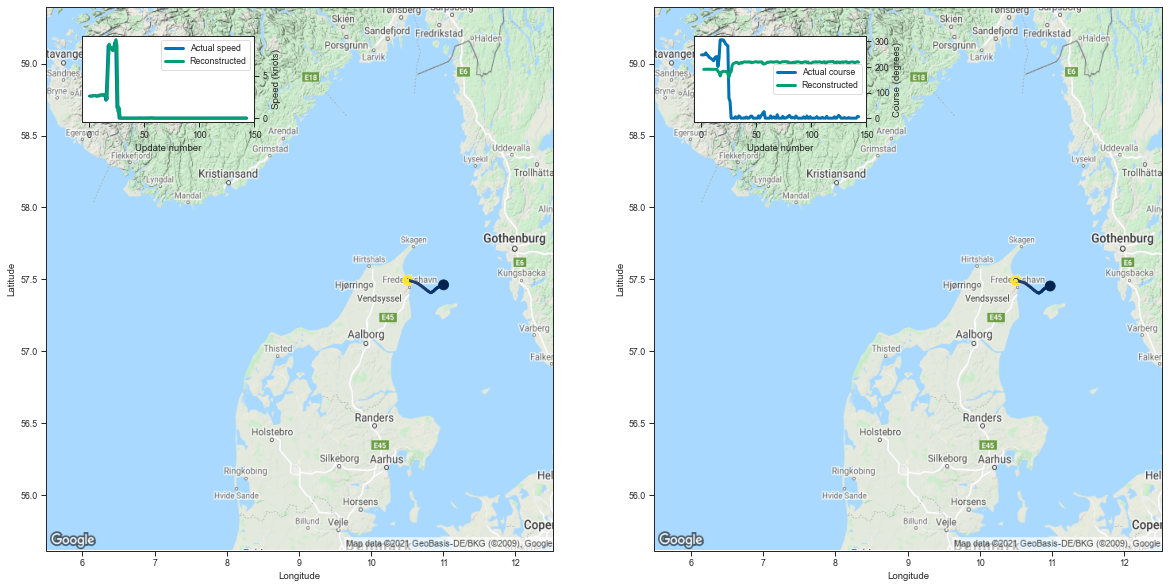

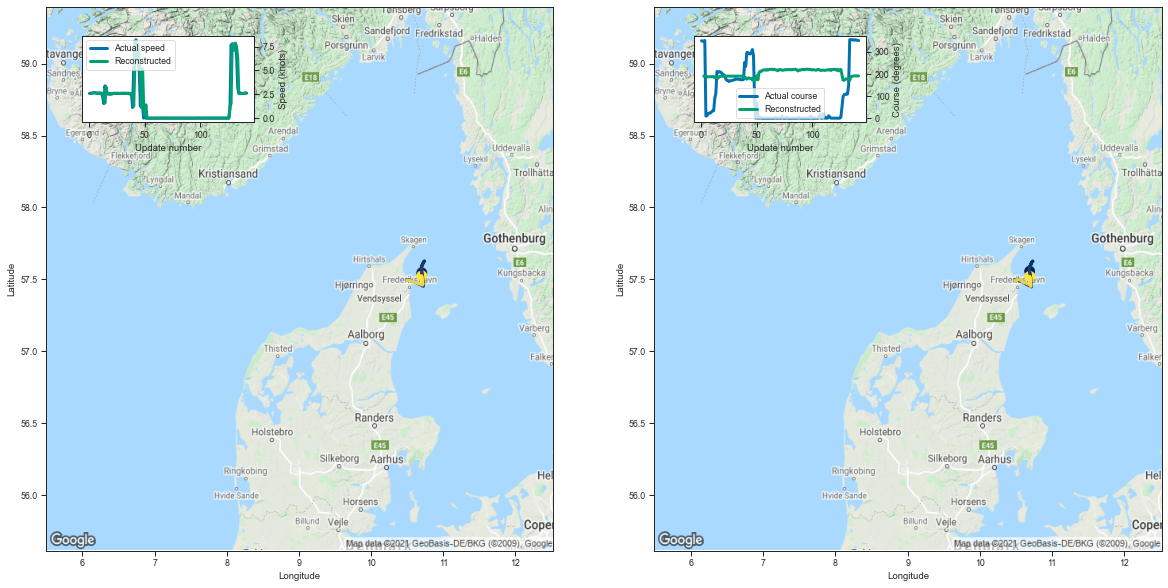

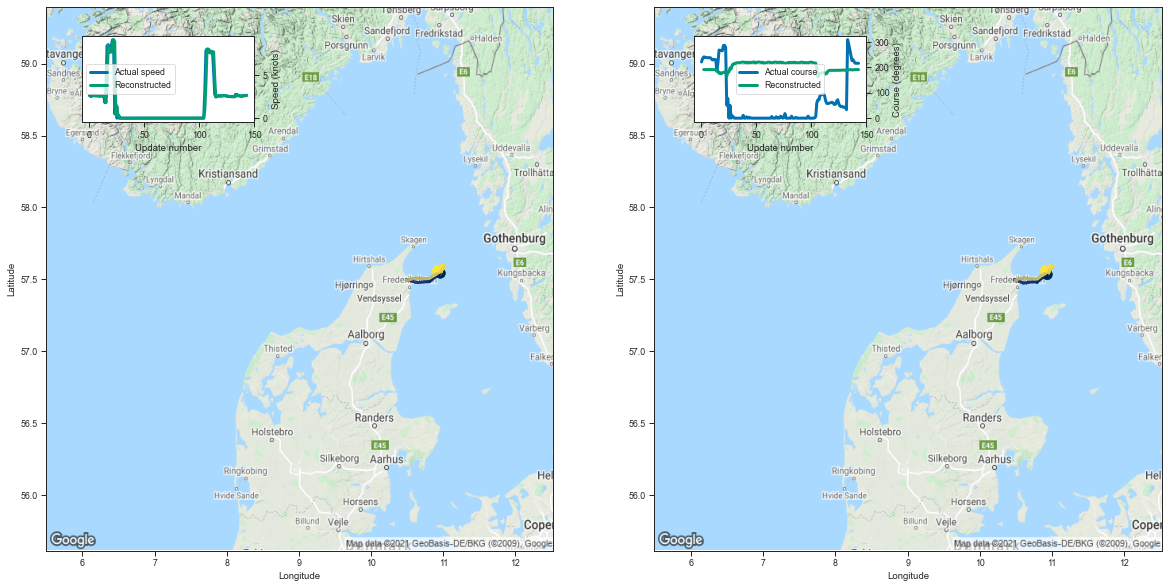

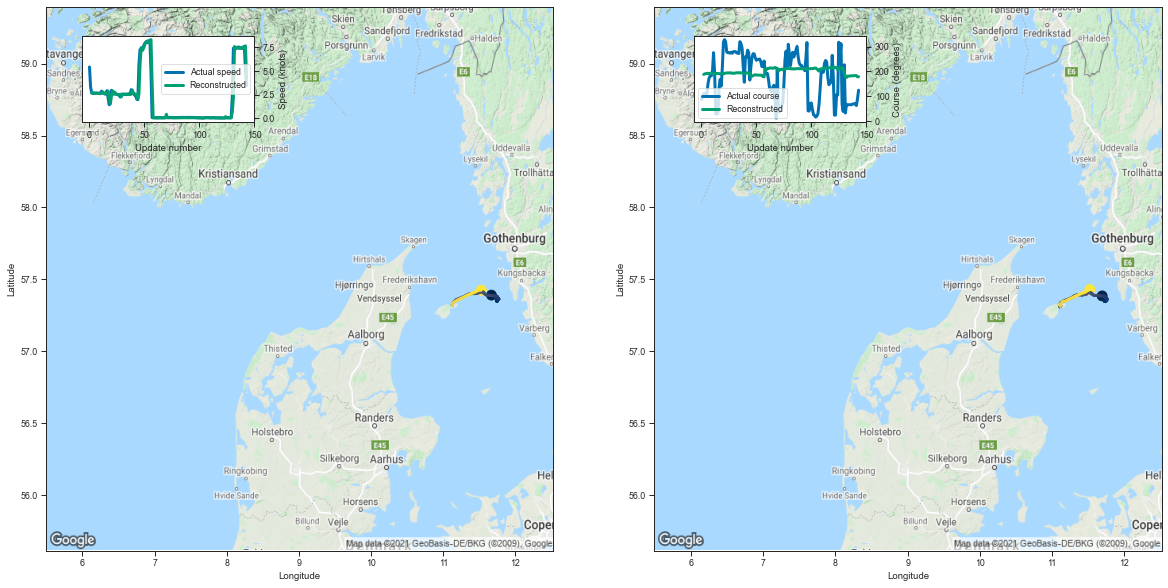

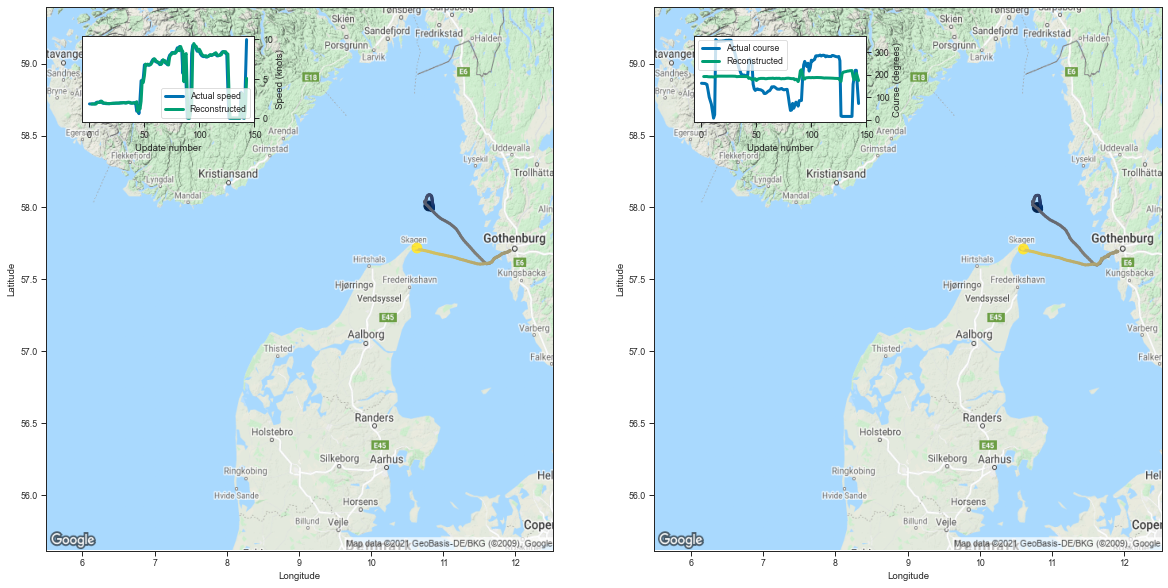

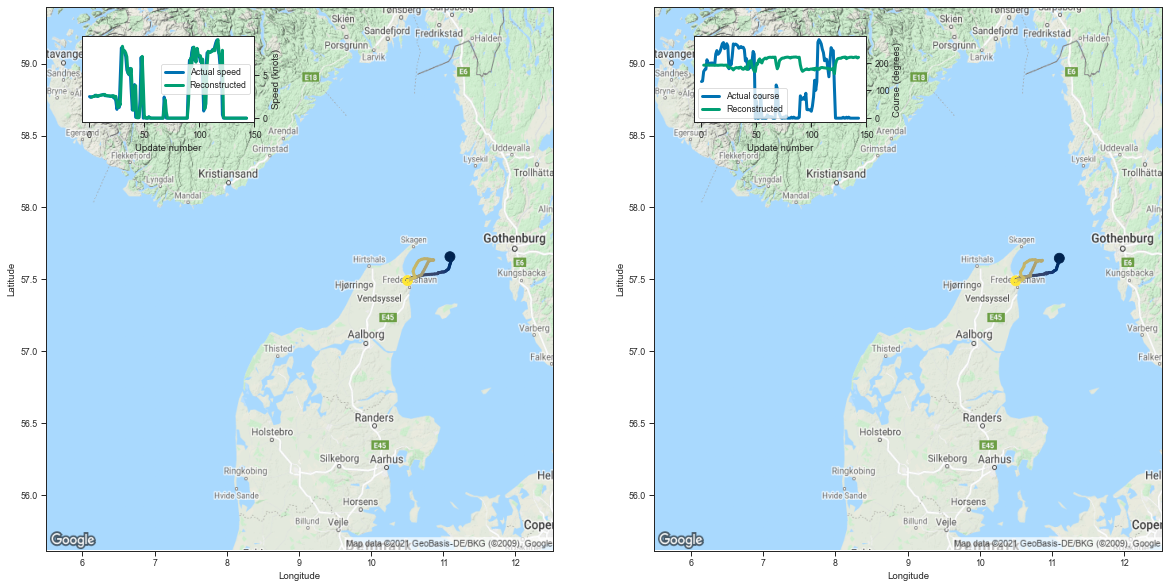

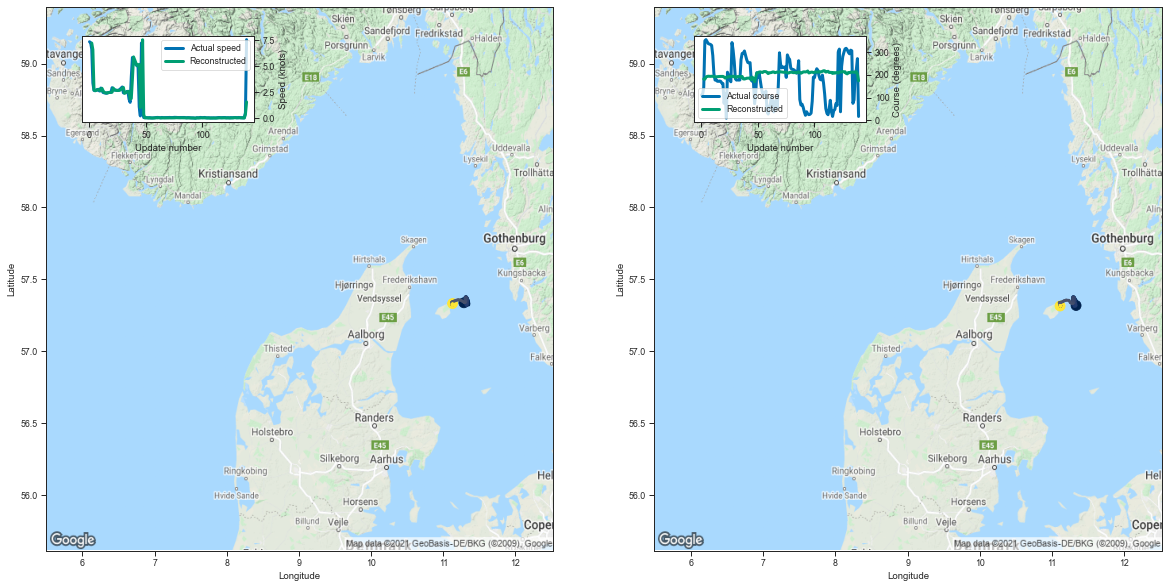

In [39]:
# Plot the actual and reconstructed trajectories side by side
for idx in range(len(indices)): 
    tracks = plot_actual_reconstructed(indices[idx])
    print(f"--------------- Index: {idx} ({indices[idx]}) ---------------")
    print("Speed in track order:")
    print(list(tracks["Actual trajectory"]["Speed"]))
    print("Speed sorted:")
    print(list(tracks["Actual trajectory"].sort_values("Speed")["Speed"]))
df_n